In [1]:
from galaxy import Galaxy

In [2]:
basePath = f"/export/data/ucakir/TNG100/TNG100-1/output/"


In [15]:
g = Galaxy(simulation="IllustrisTNG", halo_id=20, particle_type="stars", base_path=basePath, snapshot=99)

In [16]:
img = g.get_image(field = "GFM_Metallicity")

No unit conversion for Field GFM_Metallicity. Return without changes.


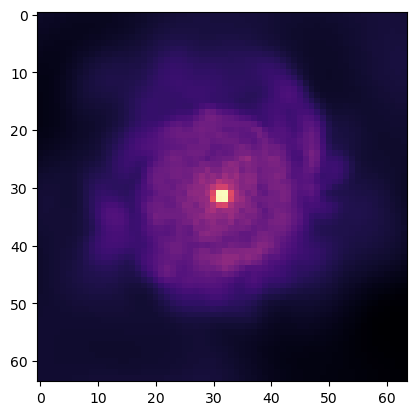

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap = "magma")
